In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import math


In [2]:
class technical_analysis:
    def __init__(self, data):
        self.data = data.copy()
        self.ax = 0
        self.fig = 0

    def create_plot(self):
        self.fig, self.ax = plt.subplots(figsize = (10,5))
        # Set background color to white
        # self.ax.set_facecolor((1.0, 1.0, 1.0))

    def plot_graph(self, time, title, color, label):
        self.ax.plot(self.data[time], self.data[title], color = color, label = label)
        
    def legend(self):
        self.ax.legend()
    
    def plot_ohlc(self, time, open, high, low, close):
        ohlc = self.data[[time, open, high, low, close]].copy()
        candlestick_ohlc(self.ax, ohlc.values, width=0.6, colorup="green", colordown="red")
    
    def rolling_mean(self, period, close, sma_colname):
        self.data[sma_colname] = None
        self.data[sma_colname] = self.data[close].rolling(period).mean()
        # Show some results
        # print(self.data.iloc[0:40,:])    

    def true_range(self, true_range, high, low, close):
        self.data[true_range] = None
        for i in range(len(self.data)):
            if i == 0:
                self.data[true_range].iloc[i] = self.data[high].iloc[i] - self.data[low].iloc[i] 
            else:
                tr_1 = self.data[high].iloc[i] - self.data[low].iloc[i]
                tr_2 = abs(self.data[high].iloc[i] - self.data[close].iloc[i-1])
                tr_3 = abs(self.data[low].iloc[i] - self.data[close].iloc[i-1])
                self.data[true_range].iloc[i] = max(tr_1, tr_2, tr_3)
          
    def average_true_range(self, average_true_range, true_range, period):
        self.data[average_true_range] = None
        current_atr = 0
        if len(self.data) < period:
            return 0
        else:
            for i in range(len(self.data)):
                if i >= period-1:
                    if current_atr == 0:
                        current_atr = sum(self.data[true_range].iloc[i-period+1:i+1]) / period
                        self.data[average_true_range].iloc[i] = current_atr
                    else:
                        current_atr = (current_atr*(period - 1) + self.data[true_range].iloc[i]) / period
                        self.data[average_true_range].iloc[i] = current_atr

    def stop_and_reverse(self, sar, open, high, low, close):
        self.data[sar] = None 
        af = 0
        for i in range(len(self.data)):
            #Price falls
            if self.data[open].iloc[i] >= self.data[close].iloc[i]:
                if i == 0:
                    self.data[sar].iloc[i] = self.data[high].iloc[i]
                    extreme = self.data[low].iloc[i]
                else:
                    if self.data[low].iloc[i] < self.data[low].iloc[i-1]:
                        if af <= 0.2:
                            af += 0.02
                    last_sar = self.data[sar].iloc[i-1]
                    self.data[sar].iloc[i] = last_sar + af*(extreme - last_sar)
                    extreme = self.data[low].iloc[i]
            #Price rises
            else:
                if i == 0:
                    self.data[sar].iloc[i] = self.data[low].iloc[i]
                    extreme = self.data[high].iloc[i]
                else:
                    if self.data[high].iloc[i] > self.data[high].iloc[i-1]:
                        if af <= 0.2:
                            af += 0.02
                    last_sar = self.data[sar].iloc[i-1]
                    self.data[sar].iloc[i] = last_sar + af*(extreme - last_sar)
                    extreme = self.data[high].iloc[i]
             
        # Show some results
        # print(self.data.iloc[0:40,:])

    

In [3]:
data = pd.read_csv("./BTC_USD_2018.csv", header = None, names = ["Timestamp", "Open", "Close", "High", "Low", "Volume"])
technical_analysis_test = technical_analysis(data.iloc[0:1000,])


In [4]:
technical_analysis_test.rolling_mean(20, "Close", "SMA_20")
technical_analysis_test.rolling_mean(60, "Close", "SMA_60")
technical_analysis_test.true_range("TR", "High", "Low", "Close")
technical_analysis_test.average_true_range("ATR", "TR", 20)
technical_analysis_test.stop_and_reverse("SAR", "Open", "High", "Low", "Close")


D:\Program Files (x86)\Virtual_Environments\ENV\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


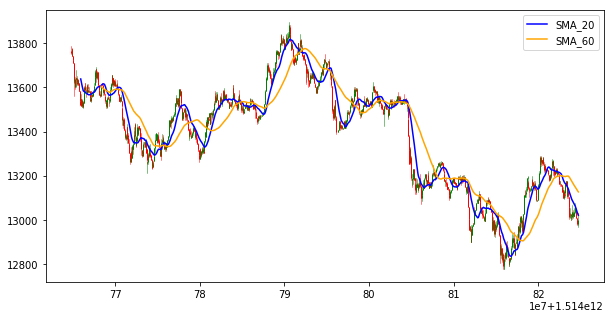

In [5]:
#Plot ohlc, sma_20 and sma_60
technical_analysis_test.create_plot()
technical_analysis_test.plot_ohlc("Timestamp", "Open", "High", "Low", "Close")
technical_analysis_test.plot_graph("Timestamp", "SMA_20", "blue", "SMA_20")
technical_analysis_test.plot_graph("Timestamp", "SMA_60", "orange", "SMA_60")
technical_analysis_test.legend()


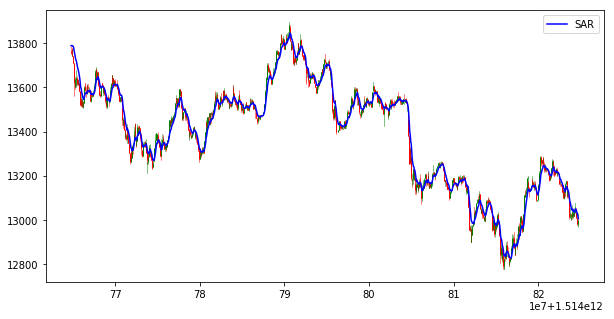

In [6]:
#plot ohlc and sar
technical_analysis_test.create_plot()
technical_analysis_test.plot_ohlc("Timestamp", "Open", "High", "Low", "Close")
technical_analysis_test.plot_graph("Timestamp", "SAR", "blue", "SAR")
technical_analysis_test.legend()


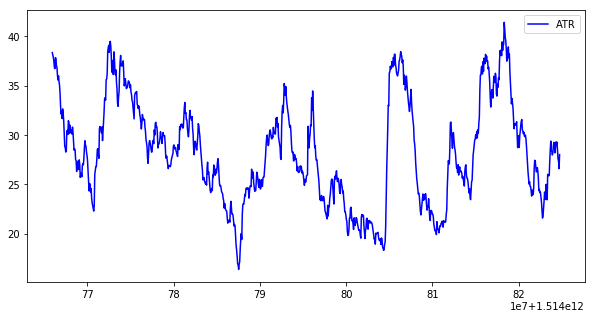

In [7]:
#plot atr
technical_analysis_test.create_plot()
technical_analysis_test.plot_graph("Timestamp", "ATR", "blue", "ATR")
technical_analysis_test.legend()


In [0]:
data["SMA_20"] = None
data["SMA_60"] = None
data["Trade_Strategy"] = None
data.head()
# data.tail()
# len(data)


In [0]:
data["SMA_20"] = data['Close'].rolling(20).mean()
data["SMA_60"] = data['Close'].rolling(60).mean()
data.head(30)


In [0]:
# data["SMA_20"].plot()
# data["SMA_60"].plot()
# data.plot(x = "Timestamp", y = ["SMA_20", "SMA_60"])
data.iloc[0:1000,].plot(x = "Timestamp", y = ["SMA_20", "SMA_60"])
plt.show()


In [0]:
# math.isnan(data["SMA_20"].iloc[10])
# math.isnan(data["SMA_60"].iloc[100])


In [0]:
data2 = data.iloc[0:1000,].copy()
data2.tail()


In [0]:
def buy_or_sell(i):
    if data2["SMA_20"].iloc[i] > data2["SMA_60"].iloc[i]:
        return 1
    elif data2["SMA_20"].iloc[i] < data2["SMA_60"].iloc[i]:
        return -1
    else:
        return 0


In [0]:
can_buy = True
trade_times = 0
for i in range(len(data2)):
    if math.isnan(data2["SMA_20"].iloc[i]) == False and math.isnan(data2["SMA_60"].iloc[i]) == False:
        if can_buy:
            if buy_or_sell(i) > 0:
                data2["Trade_Strategy"].iloc[i] = "Buy"
                trade_times += 1
                can_buy = False
                
        else:
            if buy_or_sell(i) < 0:
                data2["Trade_Strategy"].iloc[i] = "Sell"
                trade_times += 1
                can_buy = True


In [0]:
# for i in range(len(data2)):
    # print(data2["Trade_Strategy"].iloc[i])


In [0]:
plot_result_SMA = data2.plot(x = "Timestamp", y = ["Close", "SMA_20", "SMA_60"], figsize = (10, 5))
# plot_result_SMA.set_facecolor((1.0, 1.0, 1.0))
plot_result_buy = data2.where(data2["Trade_Strategy"] == "Buy").plot.scatter(x = "Timestamp", y = "Close", c = "Red", s = 80, ax = plot_result_SMA)
plot_result_sell = data2.where(data2["Trade_Strategy"] == "Sell").plot.scatter(x = "Timestamp", y = "Close", c = "Blue", s = 80, ax = plot_result_SMA)
print(plot_result_SMA == plot_result_buy == plot_result_sell)


In [0]:
#TODO
# ohlc= data2[["Timestamp", "Open", "High", "Low", "Close"]].copy()
# mpl_finance.candlestick_ohlc(ax = plot_result_SMA, quotes = ohlc, width = 0.2, colorup = "Green", colordown = "Red", alpha = 1.0)
# print(plot_result_SMA == candlestick_ohlc == plot_result_buy == plot_result_sell)

